In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn

In [2]:
# Converting data to torch.FloatTensor
transform = transforms.ToTensor()

In [3]:
# Download the training and test datasets
train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


#### Initialize train and test loaders

In [4]:
# Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=0)
### BEGIN SOLUTION
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, num_workers=0)
### END SOLUTION

In [5]:
### BEGIN HIDDEN TESTS
# Assert DataLoader is not None
assert test_loader is not None, "DataLoader initialization failed"
### END HIDDEN TESTS

In [6]:
# Utility functions to un-normalize and display an image
def imshow(img):
    img = img / 2 +0.5
    plt.imshow(np.transpose(img, (1, 2, 0)))

In [7]:
# Defin the image classes
### BEGIN SOLUTION
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
### END SOLUTION

In [8]:
### BEGIN HIDDEN TESTS
# Check that number of classes is 10
assert len(classes) == 10, f"Expected 10 classes but got {len(classes)}"
### END HIDDEN TESTS

In [9]:
# Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# Convert images to numpy array
### BEGIN SOLUTION
images = images.numpy() 
### END SOLUTION

In [10]:
### BEGIN HIDDEN TESTS
assert isinstance(images, np.ndarray), f"Expected output to be a Numpy array"
### END HIDDEN TESTS

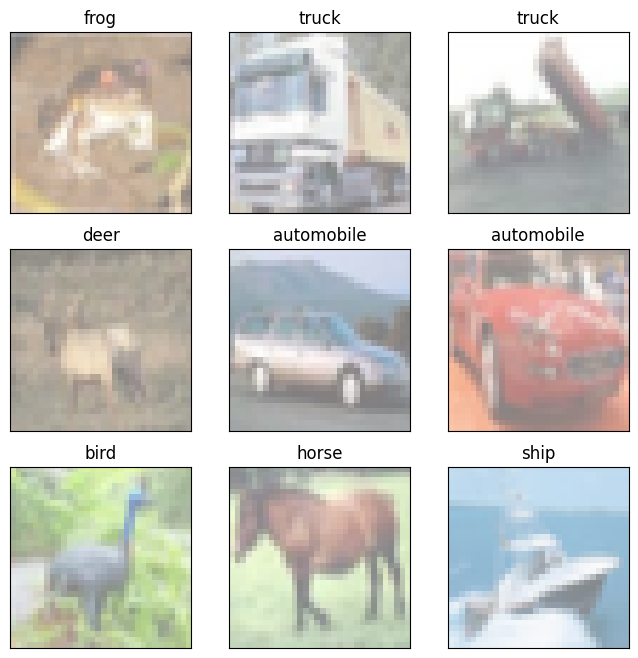

In [11]:
# Plot the images
fig = plt.figure(figsize=(8,8))
# display images
for idx in np.arange(9):
    ax = fig.add_subplot(3, 3, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
plt.show()    

In [13]:
# Define the Convolutional Autoencoder
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        
        # Encoder
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # DEFINE NEXT CONV LAYER and Pooling layer
        # Use 3 by 3 Filter and padding as 1
        # Use Max Pooling with 2 By 2
        ### BEGIN SOLUTION
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        ### END SOLUTION
        # Decoder
        # DEFINE THE DECODER 
        ### BEGIN SOLUTION
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)
        ### END SOLUTION
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))
        return x

In [14]:
### BEGIN HIDDEN TESTS
model_test = ConvAutoEncoder()
assert isinstance(model_test.conv2, nn.Conv2d), "conv2 is not Conv2d layer"
assert model_test.conv2. kernel_size == (3, 3), "conv2 kernel size is not (3, 3)"
### END HIDDEN TESTS

In [15]:
### BEGIN HIDDEN TESTS
assert isinstance(model_test.t_conv1, nn.ConvTranspose2d), "t_conv1 is not ConvTranspose2d"
assert model_test.t_conv2.stride == (2,2), "t_conv2 stride is not (2, 2)"
### END HIDDEN TESTS

In [16]:
# Instantiate the model
model = ConvAutoEncoder()
print(model)

ConvAutoEncoder(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [20]:
# Loss function
# Use Binary Cross Entropy loss and assign it to criterion object
### BEGIN SOLUTION
criterion = nn.BCELoss()
### END SOLUTION

In [22]:
### BEGIN HIDDEN TESTS
assert isinstance(criterion, nn.BCELoss), f"Criterion is not nn.BCELoss"
### END HIDDEN TESTS

In [21]:
# Optimizer
# Use Adam 'optimizer' with learning 0.001
### BEGIN SOLUTION
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
### END SOLUTION

In [23]:
### BEGIN HIDDEN TESTS
assert isinstance(optimizer, optim.Adam), f"Optimizer is not torch.optim.Adam, but {type(optimizer)}"
### END HIDDEN TESTS

In [24]:
# Epochs
n_epochs = 2
for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    # Training
    for data in train_loader:
        images, _ = data
        optimizer.zero_grad()
        # Send input images through network and
        # calculate loss, perform backprop and optimize
       
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*images.size(0)
        
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch: 1 	Training Loss: 18.408822
Epoch: 2 	Training Loss: 18.373079


In [25]:
# Batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [26]:
# Sample outputs
output = model(images)
images = images.numpy()

In [27]:
batch_size = 32
output = output.view(batch_size, 3, 32, 32)
output = output.detach().numpy()

Original Images


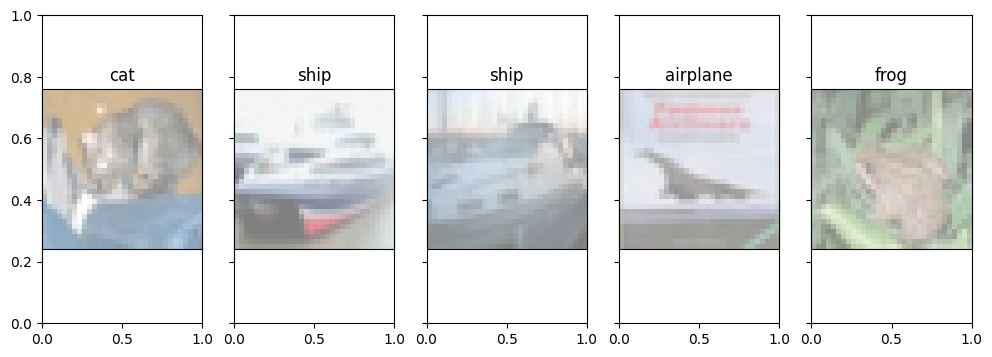

Reconstructed Images


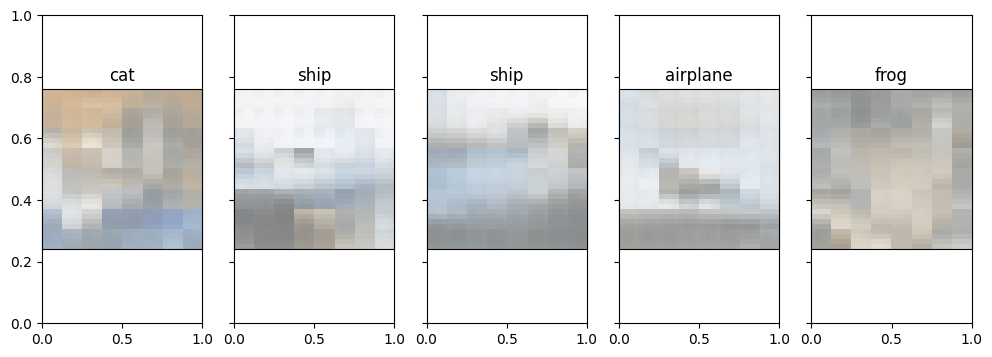

In [28]:
# Original images
print("Original Images")
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
plt.show()

# Reconstructed images
print("Reconstructed Images")
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12, 4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    ax.set_title(classes[labels[idx]])
    
plt.show()